## Bike Sharing Trends

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
import pylab
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [109]:
original_dataset=pd.read_csv('./train-3.csv')
df=original_dataset.copy()

## Expolatory Data Analysis

In [110]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### There are no null values which is a good start

In [111]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### Segregating datetime for better insights and EDA

In [112]:
df['datetime']=pd.to_datetime(df['datetime'])


df['day']=df['datetime'].map(lambda x:x.day)
df['month']=df['datetime'].map(lambda x:x.month)
df['year']=df['datetime'].map(lambda x:x.year)
df['hour']=df['datetime'].map(lambda x:x.hour)

df.drop(labels=['datetime'], axis=1, inplace=True)

In [113]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011,4


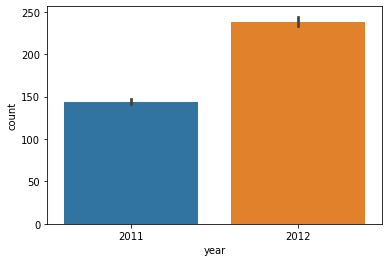

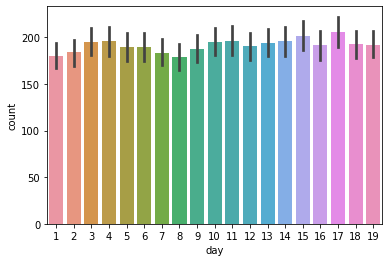

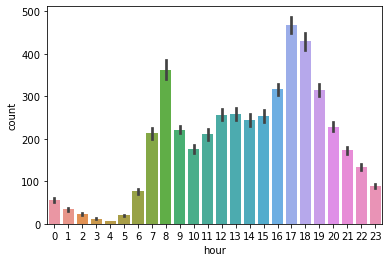

In [123]:
# def Barplot(df, feature):

#     sns.barplot(x=df[feature], y=df['count'])
#     plt.show()

# Barplot(df, 'year')
# Barplot(df, 'day')
# Barplot(df, 'hour')



- Twice the number of poeple opted for cycles in 2012 comapred to previous year.


- In morning 8:00 AM cycles are used as  means of commute to work and in  evening 5-6 PM people use cycle to have fun.

<AxesSubplot:xlabel='hour', ylabel='count'>

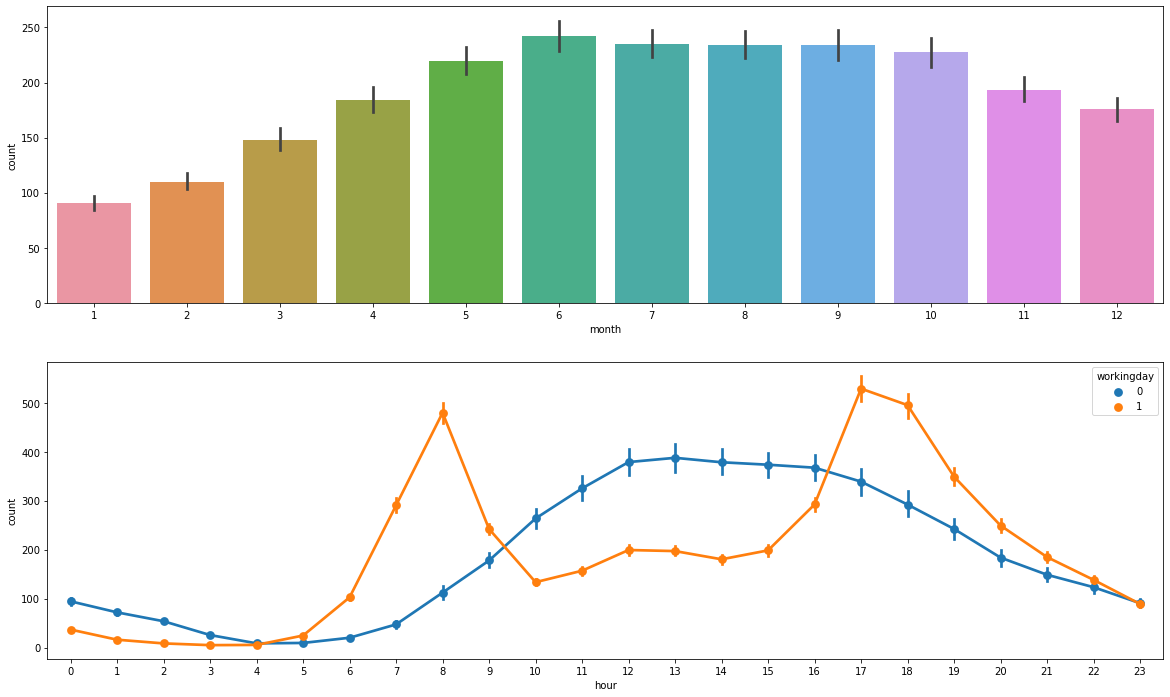

In [137]:
fig, (ax1,ax2) = plt.subplots(nrows=2)
fig.set_size_inches(20, 12)

sns.barplot(x=df['month'], y=df['count'],ax=ax1)
sns.pointplot(x=df['hour'], y=df['count'], hue=df['workingday'],ax=ax2)

- From January to May, it is quite cold in Washington DC, that is the reason very few people opt for cycles, but from june to october the weather is quite pleasent and that is when poeple opt for the cycles the most.

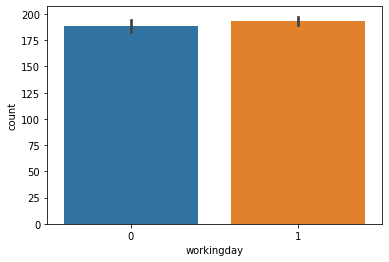

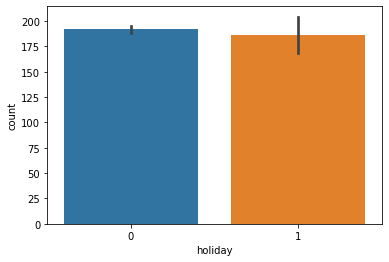

<AxesSubplot:xlabel='season', ylabel='count'>

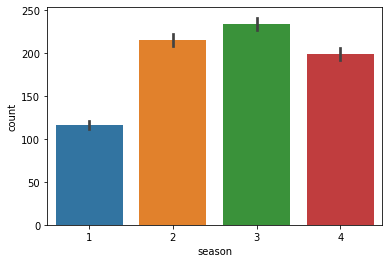

In [75]:
Barplot(df,'workingday')
Barplot(df, 'holiday')
sns.barplot(x=df['season'], y=df['count'])


- There is clearly no such difference for using cycles on holidays or weekends

- 

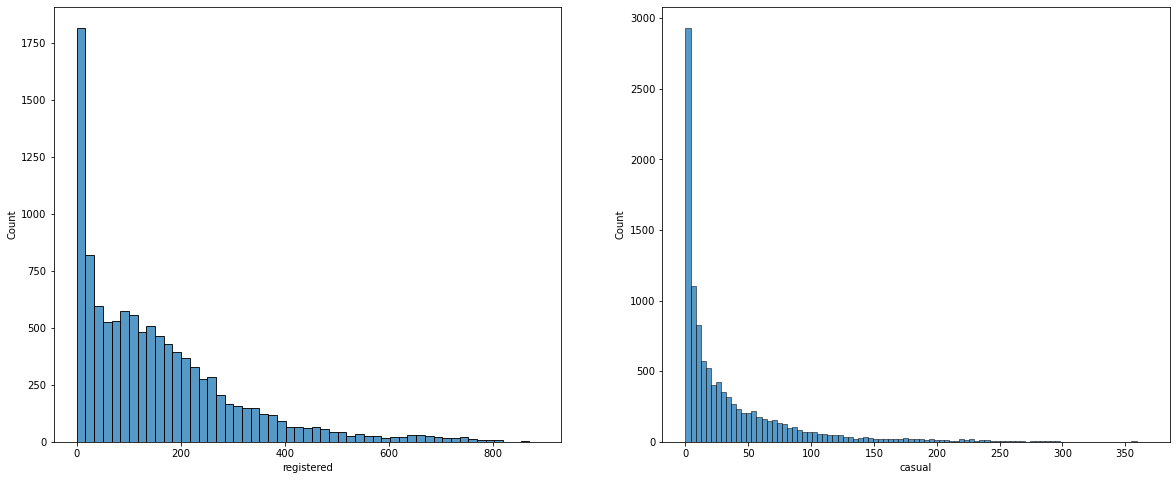

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.histplot(df['registered'], ax=ax1)
sns.histplot(df['casual'], ax=ax2)
plt.show()


- We can clearly see there were more registered users and the data is rightly skewed

## Feature Engineering

#### Using Q-Q plot to check which features are following Gausian Distribution


casual


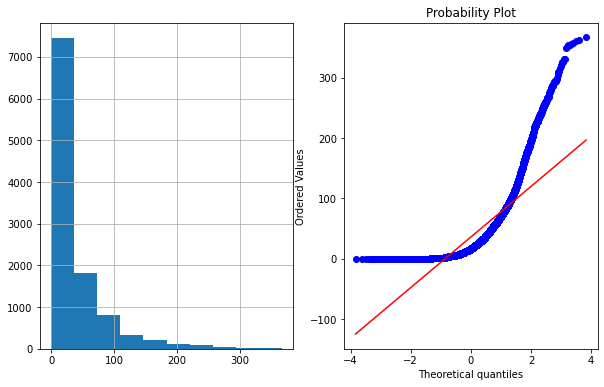

registered


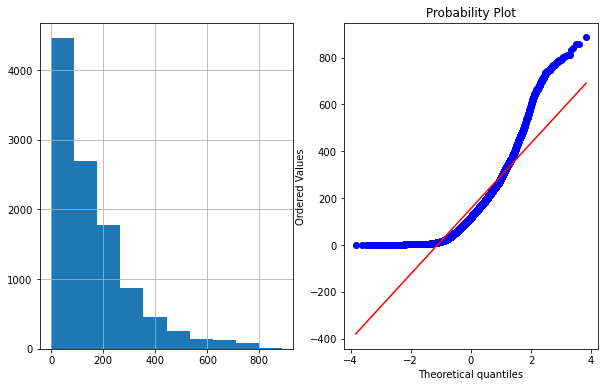

casual


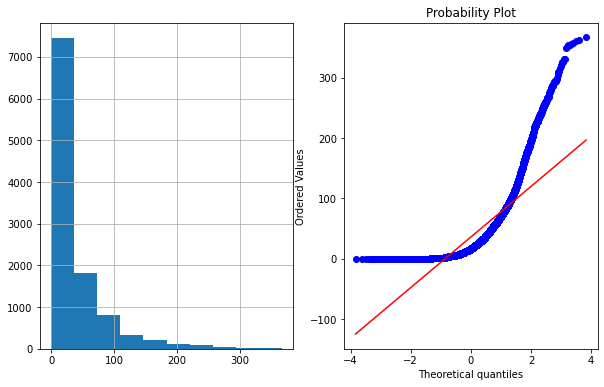

windspeed


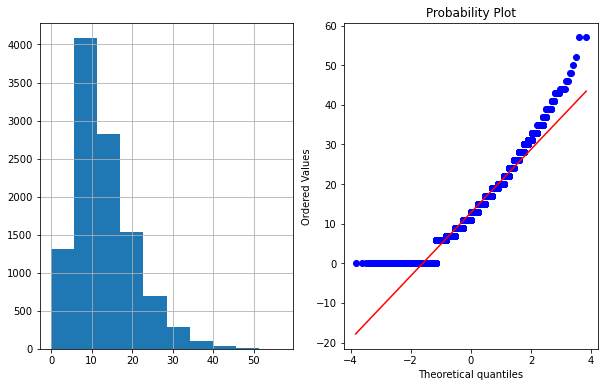

humidity


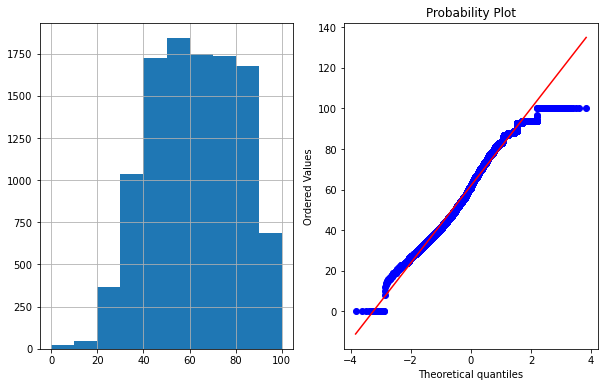

temp


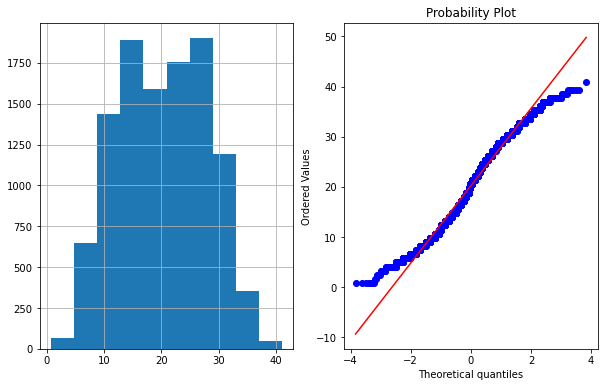

atemp


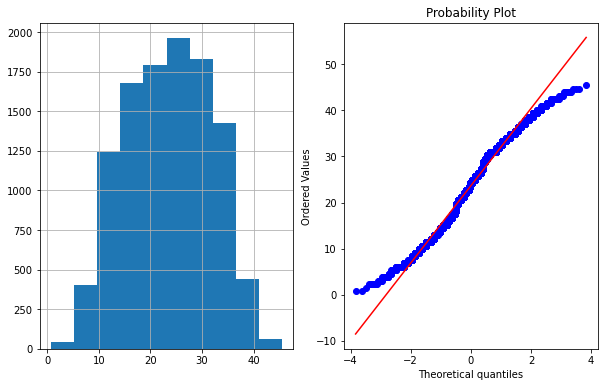

In [77]:
def plot_data(df, feature):
    # This is for the left graph
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    print(feature)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()


plot_data(df, 'casual')
plot_data(df, 'registered')
plot_data(df, 'windspeed')
plot_data(df, 'humidity')
plot_data(df, 'temp')
plot_data(df, 'atemp')

####  Fixing the right skewed data of registered,windspeed and casual with <br/>**BoxCox Transformation** <br/>as most of the ML Algos perform better with gausian distribution

casual


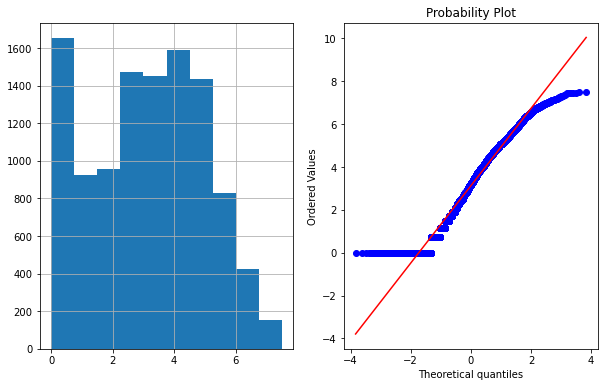

registered


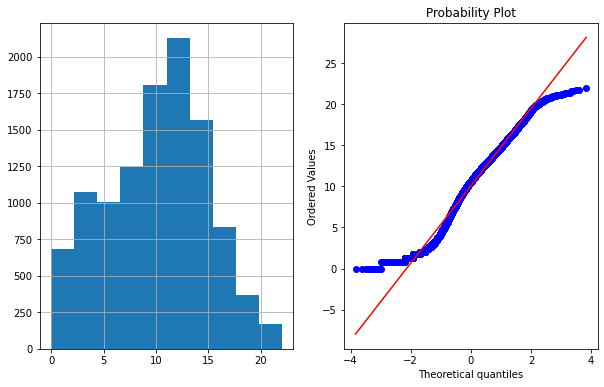

windspeed


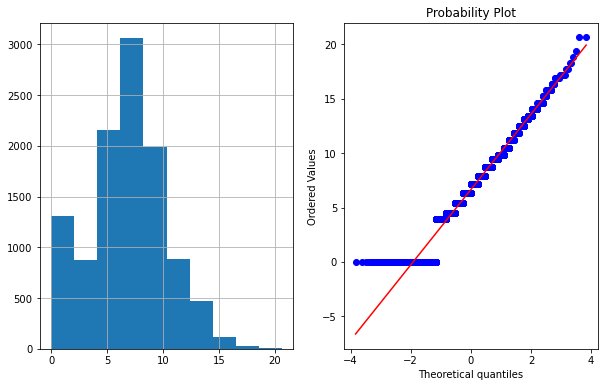

In [ ]:
df['casual'],parameters=stat.boxcox(df['casual']+1)
plot_data(df,'casual')

df['registered'],parameters=stat.boxcox(df['registered']+1)
plot_data(df,'registered')

df['windspeed'],parameters=stat.boxcox(df['windspeed']+1)
plot_data(df,'windspeed')

#### Scaling the data with <br/> **Min-Max Scaler**

In [ ]:
min_max=MinMaxScaler()
df_scaled=pd.DataFrame(min_max.fit_transform(df), columns=df.columns)

df_scaled.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hour
0,0.0,0.0,0.0,0.0,0.224490,0.305068,0.81,0.0,0.195214,0.182347,0.015369,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.204082,0.288064,0.80,0.0,0.319544,0.279815,0.039959,0.0,0.0,0.0,0.043478
2,0.0,0.0,0.0,0.0,0.204082,0.288064,0.80,0.0,0.256400,0.259162,0.031762,0.0,0.0,0.0,0.086957
3,0.0,0.0,0.0,0.0,0.224490,0.305068,0.75,0.0,0.195214,0.159129,0.012295,0.0,0.0,0.0,0.130435
4,0.0,0.0,0.0,0.0,0.224490,0.305068,0.75,0.0,0.000000,0.034999,0.000000,0.0,0.0,0.0,0.173913


## Feature Selection

In [ ]:
X = df.drop(labels=['count'], axis=1)
y = df['count']

y.head()

def kBest(number):
    ordered_rank_features = SelectKBest(score_func=chi2)
    ordered_feature = ordered_rank_features.fit(X, y)

    dfscores = pd.DataFrame(ordered_feature.scores_, columns=["Score"])
    dfcolumns = pd.DataFrame(X.columns)

    features_rank = pd.concat([dfcolumns, dfscores], axis=1)
    features_rank.columns = ['Features', 'Score']
    return features_rank.sort_values(by=['Score'], ascending=False).head(number)


kBest(20)


,Features,Score
9,registered,23962.821249
13,hour,18120.477372
6,humidity,12286.067545
8,casual,8800.794849
4,temp,8174.188620
5,atemp,8152.501468
10,day,2429.088872
11,month,2189.557845
7,windspeed,1880.994819
1,holiday,681.355480


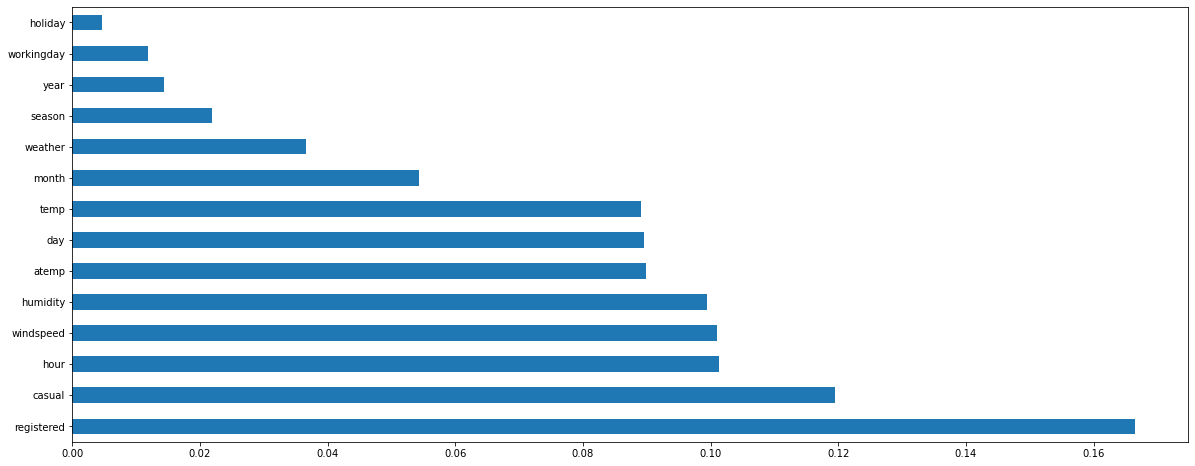

In [ ]:
X = df.drop(labels=['count'], axis=1)
y = df['count']

y.head()

def ETC(number):
    model = ExtraTreesClassifier()
    model.fit(X, y)
    ranked_features = pd.Series(model.feature_importances_, index=X.columns)

    ranked_features.nlargest(number).plot(kind='barh', figsize=(20, 8))
    plt.show()


ETC(20)


- One of the important features while people are renting cycles are that is whether its windy, how is the temp to take out the cycle and is there humidity or not

<AxesSubplot:>

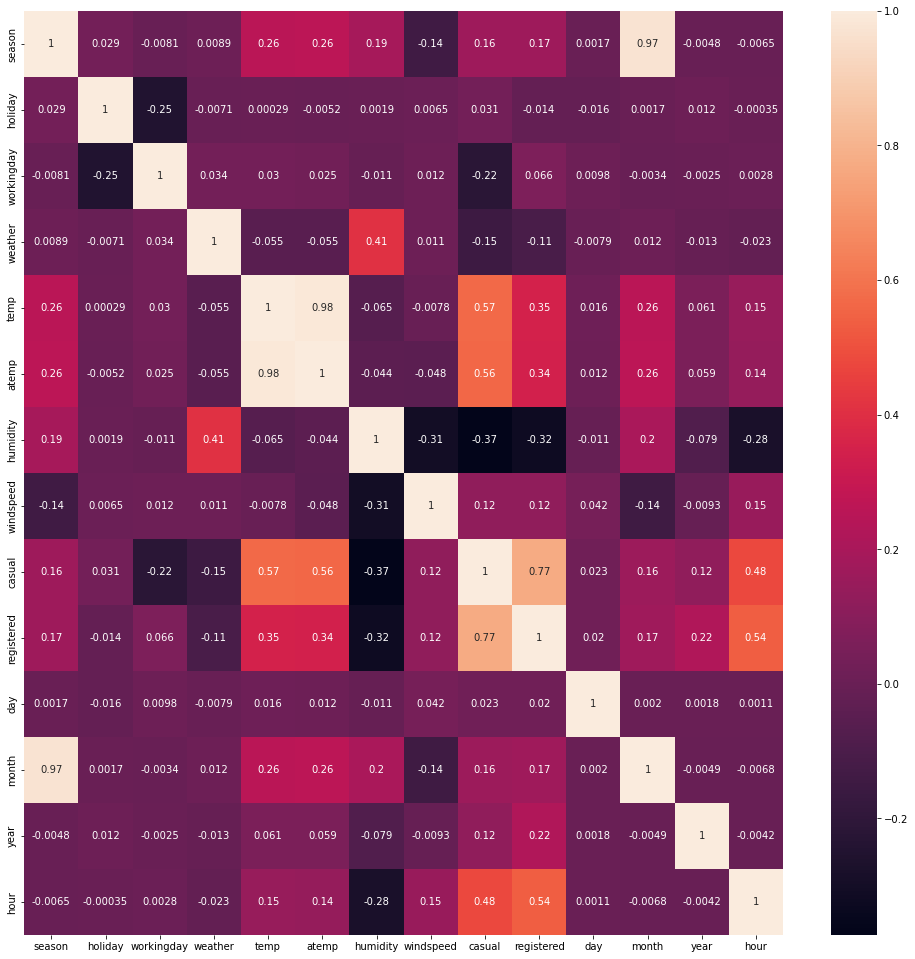

In [ ]:
def correlationMap():

    corr = df.drop(labels=['count'], axis=1).corr()
    top_features = corr.index
    plt.figure(figsize=(17, 17))
    return sns.heatmap(df[top_features].corr(), annot=True)


correlationMap()


In [ ]:
def correlation_2(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)

    return col_corr

correlation_2(df,0.8)

{'atemp', 'count', 'month'}

- As we can see that 'atemp' and 'month' are highly correlated feature, so dropping those columns

In [ ]:
df_scaled.drop(labels=['atemp','month'], axis=1, inplace=True)

### Model Selection

In [ ]:
from sklearn import preprocessing
from sklearn import utils

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

y_transformed


array([ 15,  39,  31, ..., 167, 128,  87])

In [ ]:
X=df_scaled.drop(labels=['count'], axis=1)
y=df_scaled['count']

X_train, X_test, y_train, y_test = train_test_split(
    X, y_transformed, test_size=0.3, random_state=69)

X_train.shape, X_test.shape

((7620, 12), (3266, 12))

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores=cross_val_score(rfr, X_train, y_train, cv=10)
print(cv_scores)
print()
print('Accuracy =',cv_scores.mean())

[0.99961155 0.99976017 0.99975123 0.99975074 0.99936108 0.99966488
 0.99975246 0.99956092 0.99968429 0.99979475]

Accuracy = 0.9996692086773816


### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
cv_scores=cross_val_score(dtr, X_train, y_train, cv=10)
print(cv_scores)
print()
print('Accuracy =',cv_scores.mean())

[0.99892837 0.99918573 0.99884133 0.99880057 0.99820859 0.99895409
 0.99880629 0.99868014 0.99885273 0.99895835]

Accuracy = 0.9988216197474733


In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
cv_scores=cross_val_score(ridge, X_train, y_train, cv=10)
print(cv_scores)
print()
print('Accuracy =',cv_scores.mean())

[0.84636709 0.85465645 0.86485195 0.85524292 0.85673935 0.86127382
 0.86019806 0.85272633 0.86013066 0.84985865]

Accuracy = 0.8562045280730594


### Decision Tree Regressor is giving the best Accuracy
- Testing on the Test DataSet now

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_test, y_test)


DecisionTreeRegressor()

In [ ]:
cv_scores=cross_val_score(dtr, X_test, y_test, cv=10)
print(cv_scores)
print()
print('Accuracy =',cv_scores.mean())

[0.99677173 0.9973827  0.99774991 0.99687655 0.99760562 0.99644532
 0.9979963  0.99743402 0.99788757 0.99793184]

Accuracy = 0.99740815674771
